In [3]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/7d/df/2c3f3a838b4fa5334ab79a5e0e4efacfb9a1a2fa1ab9e4d343be655fcb64/torch-2.2.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/66/3b7392a52bb541efc95afebf72c8574e2530fee39153cb02efc8fc97d82c/torchvision-0.17.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/c1/b3/4f1682fcebd9159da2d729374a5c87c309500dab747fce8d004d419c4a5d/torchaudio-2.2.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [9]:
%cd yolov5
%pip install -qr requirements.txt

C:\Users\6samy\yolov5
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Python310\lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\6samy/.cache\torch\hub\master.zip
YOLOv5  2024-3-18 Python-3.10.7 torch-2.2.1+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:52<00:00, 281kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradie

In [12]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [13]:
img = 'https://images.seattletimes.com/wp-content/uploads/2017/07/1a04f45a-6689-11e7-8665-356bf84600f6.jpg?d=960x534'

In [14]:
result = model(img)
result.print()

image 1/1: 534x960 7 persons, 29 cars, 9 buss, 1 truck
Speed: 1885.3ms pre-process, 201.3ms inference, 23.4ms NMS per image at shape (1, 3, 384, 640)


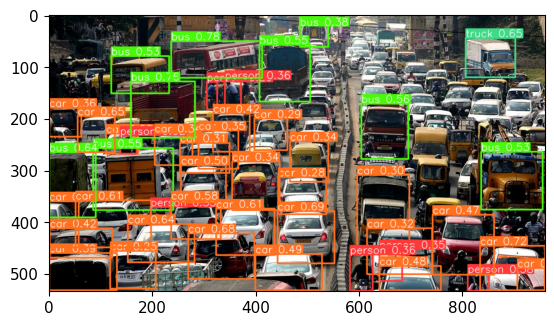

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [20]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()